In [213]:
#importing necessary packages
import string
import re
import math
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
import nltk, re, pprint
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import words
import random
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tifat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tifat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\tifat\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

# Answer 6

In [214]:
# Function to get frequency distribution of the vocabulary
def get_vocabulary_list(text_name):
        words = nltk.word_tokenize(text_name.lower())
        words = [word for word in words if word.isalpha()]
        freq_dist = nltk.FreqDist(words)
        
        return freq_dist

In [215]:
# Function to calculate OOV
def calculate_oov(test, train):
    oov = 0
    for key, value in test.items():
        if key not in train.keys():
            oov += value
            
    return oov

In [216]:
# Function to calculate OOV rate
def calculate_oov_rate(test, train):
    oov = 0
    for key, value in test.items():
        if key not in train.keys():
            oov += value
    
    oov_rate = oov / sum(test.values())
    return oov_rate

In [217]:
#Vocabulary size for each of the training set has been calculated here

open_file = open('Materials/train/train1.txt', 'r', encoding='utf-8')
train1 = open_file.read()
voc_train1 = get_vocabulary_list(train1)
print('Total size of tokens and vocabulary for train1.txt are', sum(voc_train1.values()), len(voc_train1.values()))

open_file = open('Materials/train/train2.txt', 'r', encoding='utf-8')
train2 = open_file.read()
voc_train2 = get_vocabulary_list(train2)
print('Total size of tokens and vocabulary for train2.txt are', sum(voc_train2.values()), len(voc_train2.values()))

open_file = open('Materials/train/train3.txt', 'r', encoding='utf-8')
train3 = open_file.read()
voc_train3 = get_vocabulary_list(train3)
print('Total size of tokens and vocabulary for train3.txt are', sum(voc_train3.values()), len(voc_train3.values()))

open_file = open('Materials/train/train4.txt', 'r', encoding='utf-8')
train4 = open_file.read()
voc_train4 = get_vocabulary_list(train4)
print('Total size of tokens and vocabulary for train1.txt are', sum(voc_train4.values()), len(voc_train4.values()))

open_file = open('Materials/train/train5.txt', 'r', encoding='utf-8')
train5 = open_file.read()
voc_train5 = get_vocabulary_list(train5)
print('Total size of tokens and vocabulary for train1.txt are', sum(voc_train5.values()), len(voc_train5.values()))

vocabulary_list = [len(voc_train1.values()),len(voc_train2.values()), len(voc_train3.values()), len(voc_train4.values()), len(voc_train5.values())]

Total size of tokens and vocabulary for train1.txt are 535 285
Total size of tokens and vocabulary for train2.txt are 746 351
Total size of tokens and vocabulary for train3.txt are 1725 628
Total size of tokens and vocabulary for train1.txt are 7240 1500
Total size of tokens and vocabulary for train1.txt are 20672 3022


In [218]:
# Vocabulary size for the test set has been calculated here

open_file = open('Materials/test/test.txt', 'r', encoding='utf-8')
test1 = open_file.read()

voc_test1 = get_vocabulary_list(test1)
print('Total size of tokens and vocabulary for train1.txt are', sum(voc_test1.values()), ',', len(voc_test1.values()))

Total size of tokens and vocabulary for train1.txt are 28712 , 3082


In [227]:
# OOV is calculated for the testset w.r.t. each of the trainsets

oov_list = []
oov_list.append(calculate_oov(voc_test1, voc_train1))
oov_list.append(calculate_oov(voc_test1, voc_train2))
oov_list.append(calculate_oov(voc_test1, voc_train3))
oov_list.append(calculate_oov(voc_test1, voc_train4))
oov_list.append(calculate_oov(voc_test1, voc_train5))
print('OOV are respectively',oov_list)

OOV are respectively [15559, 16325, 12197, 8516, 5752]


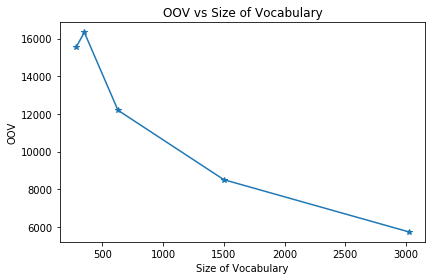

In [220]:
# Plotting of graph of OOV vs Vocabulary (only OOV was mentioned in question, that's why we plotted for both OOV and OOV rate)

plt.xlabel('Size of Vocabulary')
plt.ylabel('OOV')
plt.title("OOV vs Size of Vocabulary")
plt.tight_layout()
plt.plot(vocabulary_list,oov_list,'-*')
plt.show()

In [228]:
# OOV rate is calculated for the testset w.r.t. each of the trainsets

oov_rate_list = []
oov_rate_list.append(calculate_oov_rate(voc_test1, voc_train1))
oov_rate_list.append(calculate_oov_rate(voc_test1, voc_train2))
oov_rate_list.append(calculate_oov_rate(voc_test1, voc_train3))
oov_rate_list.append(calculate_oov_rate(voc_test1, voc_train4))
oov_rate_list.append(calculate_oov_rate(voc_test1, voc_train5))
print('OOV rate are respectively',oov_rate_list)

OOV rate are respectively [0.5418988576205072, 0.5685775982167734, 0.424804959598774, 0.296600724435776, 0.20033435497353022]


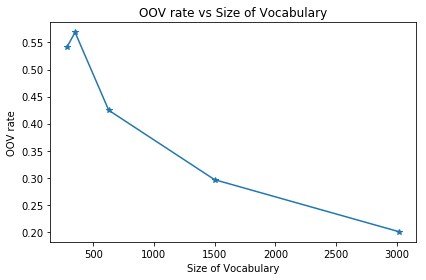

In [222]:
# Plotting of graph of OOV rate vs Vocabulary

plt.xlabel('Size of Vocabulary')
plt.ylabel('OOV rate')
plt.title("OOV rate vs Size of Vocabulary")
plt.tight_layout()
plt.plot(vocabulary_list,oov_rate_list,'-*')
plt.show()

# Answer 7:

In [230]:

words = nltk.corpus.gutenberg.words('carroll-alice.txt') #Text has been obtained from nltk
# full_text = ' '.join(words)
# file = open('original.txt','w')
# file.write(full_text)
# file.close()

#Normalization of the words
words = [word for word in words if word.isalpha()] # Removing the numerics and other annotations
words = [word.lower() for word in words]

#done with Normalization 

count = 0
change_list = ['you\'ll', 'your', 'you\'ve', 'you', 'yourself'] #different versions of you are changed to you here 
for i in range(len(words)):
    if words[i] in change_list:
        words[i] = 'you'
        count += 1

p_you = count / len(words)
print('Probability of p(w)', p_you)

# Modified version of the text is stored in text file here
full_text = ' '.join(words)

file = open('alice_modified_version.txt','w')
file.write(full_text)
file.close()

Probability of p(w) 0.01767094720667325


In [224]:
# Function to calculate correlation
def calculate_correlation(d, p_you, words):
    N_you = 0
    
    for i in range(len(words)-d):
        if words[i]=='you' and words[i+d]=='you':
            
            N_you += 1
    
    p_you_you = N_you/len(words)
    correlation = p_you_you / pow(p_you,2)
    
    return correlation

In [225]:
# Correlation values for d=[1:50] has been calculated here by calling the function
d = list(range(1,51))
correlation_list = []
for i in d:
    correlation_list.append(calculate_correlation(i, p_you, words))
print(correlation_list)

[0.35149106901739907, 2.2261101037768607, 2.929092241811659, 1.5231279657420627, 2.694764862466726, 1.9917827244319282, 3.6320743798464568, 2.460437483121794, 1.5231279657420627, 3.3977470005015245, 1.874619034759462, 2.694764862466726, 2.57760117279426, 1.874619034759462, 2.1089464141043943, 1.9917827244319282, 1.9917827244319282, 2.57760117279426, 1.9917827244319282, 1.640291655414529, 2.460437483121794, 1.28880058639713, 2.460437483121794, 1.0544732070521972, 2.343273793449327, 1.640291655414529, 1.28880058639713, 1.28880058639713, 1.874619034759462, 1.640291655414529, 1.640291655414529, 1.640291655414529, 1.0544732070521972, 1.640291655414529, 1.0544732070521972, 1.28880058639713, 0.7029821380347981, 0.937309517379731, 2.1089464141043943, 0.8201458277072645, 0.8201458277072645, 1.874619034759462, 1.1716368967246635, 1.28880058639713, 0.35149106901739907, 0.8201458277072645, 1.28880058639713, 0.8201458277072645, 0.8201458277072645, 0.937309517379731]


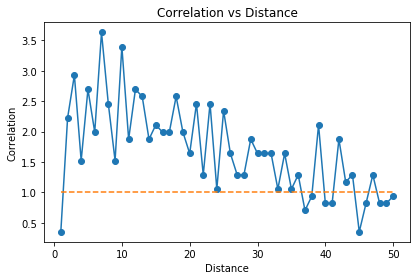

In [226]:
# Correlation vs distance graph has been plotted here
plt.xlabel('Distance')
plt.ylabel('Correlation')
plt.title("Correlation vs Distance")
plt.tight_layout()
plt.plot(d,correlation_list,'o-')
plt.plot(d, np.ones(len(correlation_list)), '--')
plt.show()